In [121]:
import numpy as np
import matplotlib.pyplot as plt

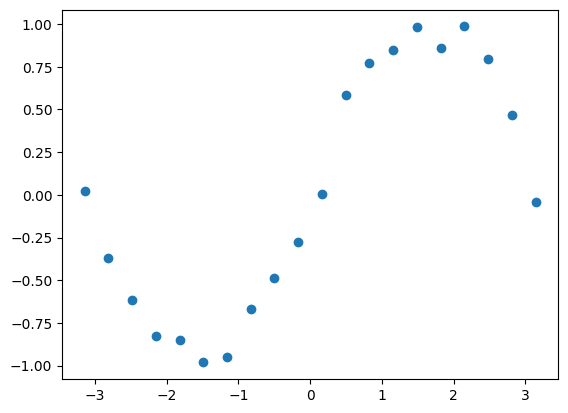

In [137]:
x = np.linspace(-np.pi,np.pi,20)
y = np.sin(x) + np.random.randn(20) / 10

plt.scatter(x,y)
plt.show()

In [123]:
def loss(A,w,y):
    return np.mean((A.dot(w)-y)**2)

def loss_with_norm(A,w,y):
    return np.mean(A.dot(w)-y)**2 + 0.5*np.linalg.norm(w)**2

In [ ]:
def grad_descent(arg_num,learning_rate,iter_times):
    w = np.zeros(arg_num)
    A = np.vstack([x**i for i in range(arg_num)]).T
    
    
    for epoch in range(iter_times):
        grad = A.T.dot(A.dot(w)-y)/len(x)
        w -= learning_rate * grad
        #print("epoch",epoch+1,"w: ",w)
    return w

def grad_descent_with_norm(arg_num,learning_rate,iter_times):
    w = np.zeros(arg_num)
    A = np.vstack([x**i for i in range(arg_num)]).T
    
    for epoch in range(iter_times):
        grad = A.T.dot(A.dot(w)-y)/len(x) + w
        w -= learning_rate * grad
        #print("epoch",epoch+1,"w: ",w)
    return w


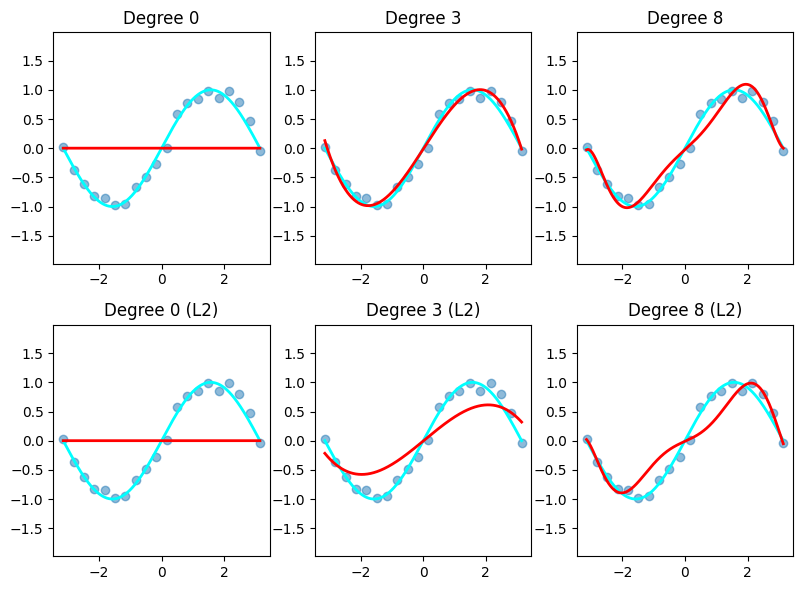

In [139]:
plt.figure(figsize=(8,6))
learning_rate_list = [1,1e-3,1.5e-7]
iter_times_list = [0,100000,50000000]
arg_num_list = [1,4,9]
split = np.linspace(-np.pi, np.pi, 10000)

for i in range(2):
    for j in range(3):
        plt.subplot(2,3,i*3+j+1)
        plt.scatter(x, y, alpha=0.5)
        
        arg_num = arg_num_list[j]
        if i == 0:
            w = grad_descent(arg_num,learning_rate_list[j],iter_times_list[j])
            title = f'Degree {arg_num-1}'
        else:
            w = grad_descent_with_norm(arg_num,learning_rate_list[j],iter_times_list[j])
            title = f'Degree {arg_num-1} (L2)'
        
        #print(w) 
        A_split = np.vstack([split**i for i in range(arg_num)]).T
        y_fit = A_split.dot(w)
        
        plt.plot(split, np.sin(split),'cyan', linewidth=2)
        plt.plot(split, y_fit, 'r', linewidth=2)
        plt.ylim(np.min(y)-1, np.max(y)+1)
        plt.title(title)

plt.tight_layout()
plt.show()
